In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_original = pd.read_csv("données sans doublon.csv")
df = df_original[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

df = df[df['charges'] < 49000]

display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [3]:
display(df["children"].describe())

display(df.groupby('children').children.count())

count    1329.000000
mean        1.097065
std         1.206308
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

children
0    569
1    322
2    239
3    156
4     25
5     18
Name: children, dtype: int64

In [4]:
display(df["smoker"].describe())

display(df.groupby('smoker').smoker.count())

count     1329
unique       2
top         no
freq      1063
Name: smoker, dtype: object

smoker
no     1063
yes     266
Name: smoker, dtype: int64

In [5]:
display(df["region"].describe())

display(df.groupby('region').region.count())

count          1329
unique            4
top       southeast
freq            361
Name: region, dtype: object

region
northeast    323
northwest    322
southeast    361
southwest    323
Name: region, dtype: int64

In [6]:
display(df["charges"].describe())

count     1329.000000
mean     13017.856433
std      11660.941136
min       1121.873900
25%       4719.736550
50%       9301.893550
75%      16297.846000
max      48970.247600
Name: charges, dtype: float64

___

### GROUP
___

In [7]:
df_group = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

# df_group['group'] = np.where(df_group['charges'] < 4746.344000, '1', 
#                              np.where(df_group['charges'] < 9386.161300, '2', 
#                              np.where(df_group['charges'] < 16657.717450, '3', '4')))

df_group['group'] = np.where(df_group['charges'] < 4719.736550, '1', 
                             np.where(df_group['charges'] < 9301.893550, '2', 
                             np.where(df_group['charges'] < 16297.846000, '3', '4')))

display(df_group)

,age,sex,bmi,children,smoker,region,charges,group
0,19,female,27.900,0,yes,southwest,16884.92400,4
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,4
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,3
1333,18,female,31.920,0,no,northeast,2205.98080,1
1334,18,female,36.850,0,no,southeast,1629.83350,1
1335,21,female,25.800,0,no,southwest,2007.94500,1


___

### MAPPING
___

In [8]:
mapping_sex = {'male': 0, 'female': 1}
mapping_smoker = {'yes': 1, 'no': 0}

df['sex'] = df['sex'].map(mapping_sex)
df['smoker'] = df['smoker'].map(mapping_smoker)
df.loc[df['region'] == 'northeast', 'northeast'] = 1
df.loc[df['region'] == 'southeast', 'southeast'] = 1
df.loc[df['region'] == 'northwest', 'northwest'] = 1
df.loc[df['region'] == 'southwest', 'southwest'] = 1

# nettoyage
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'southeast', 'northwest', 'southwest', 'charges']]

display(df[:3])

,age,sex,bmi,children,smoker,northeast,southeast,northwest,southwest,charges
0,19,1,27.90,0,1,NaN,NaN,NaN,1.0,16884.9240
1,18,0,33.77,1,0,NaN,1.0,NaN,NaN,1725.5523
2,28,0,33.00,3,0,NaN,1.0,NaN,NaN,4449.4620


___

### création datasets
___

In [9]:
# df_age['group_age'] = df_age['group'] + '|' + df_age['age'].astype(str)

df_age = df_group[['age', 'charges']]
df_age = df_age.groupby(['age']).agg({'charges': 'mean'}).reset_index()

df_sex = df_group[['sex', 'group']]
df_sex['group_sex'] = df_sex['group'] + '|' + df_sex['sex'].astype(str)
df_sex = df_sex[['group_sex']]
df_sex = df_sex.groupby(['group_sex']).agg({'group_sex': 'count'})
df_sex['group'] = df_sex.index
df_sex['sex'] = df_sex.index
df_sex['group'] = df_sex['group'].str[0]
df_sex['sex'] = df_sex['sex'].str[2:]
df_sex = df_sex.pivot_table(values='group_sex', index=['group'], columns='sex', aggfunc='sum').reset_index()

df_smoker = df_group[['smoker', 'group']]
df_smoker['group_smoker'] = df_smoker['group'] + '|' + df_smoker['smoker'].astype(str)
df_smoker = df_smoker[['group_smoker']]
df_smoker = df_smoker.groupby(['group_smoker']).agg({'group_smoker': 'count'})
df_smoker['group'] = df_smoker.index
df_smoker['smoker'] = df_smoker.index
df_smoker['group'] = df_smoker['group'].str[0]
df_smoker['smoker'] = df_smoker['smoker'].str[2:]
df_smoker = df_smoker.pivot_table(values='group_smoker', index=['group'], columns='smoker', aggfunc='sum').reset_index()
# df_smoker.fillna(0, inplace=True)

df_children = df_group[['children', 'group']]
df_children['group_children'] = df_children['group'] + '|' + df_children['children'].astype(str)
df_children = df_children[['group_children']]
df_children = df_children.groupby(['group_children']).agg({'group_children': 'count'})
df_children['group'] = df_children.index
df_children['children'] = df_children.index
df_children['group'] = df_children['group'].str[0]
df_children['children'] = df_children['children'].str[2:]
df_children = df_children.pivot_table(values='group_children', index=['group'], columns='children', aggfunc='sum').reset_index()

df_charges_by_children = df_group[['group', 'children']]
df_charges_by_children['group_children'] = df_charges_by_children['group'] + '|' + df_charges_by_children['children'].astype(str)
df_charges_by_children = df_charges_by_children[['group_children']]
df_charges_by_children = df_charges_by_children.groupby(['group_children']).agg({'group_children': 'count'})
df_charges_by_children['group'] = df_charges_by_children.index
df_charges_by_children['children'] = df_charges_by_children.index
df_charges_by_children['group'] = df_charges_by_children['group'].str[0]
df_charges_by_children['children'] = df_charges_by_children['children'].str[2:]
df_charges_by_children = df_charges_by_children.pivot_table(values='group_children', index=['children'], columns='group', aggfunc='sum').reset_index()
df_charges_by_children['P1'] = round((df_charges_by_children['1'] / np.sum(df_charges_by_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_charges_by_children['P2'] = round((df_charges_by_children['2'] / np.sum(df_charges_by_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_charges_by_children['P3'] = round((df_charges_by_children['3'] / np.sum(df_charges_by_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_charges_by_children['P4'] = round((df_charges_by_children['4'] / np.sum(df_charges_by_children[['1', '2', '3', '4']], axis=1)) * 100, 0)

df_children_no_children = df_group[['group', 'children']]
df_children_no_children['children'] = np.where(df_children_no_children['children'] > 0, 1, 0)
df_children_no_children['group_children'] = df_children_no_children['group'] + '|' + df_children_no_children['children'].astype(str)
df_children_no_children = df_children_no_children[['group_children']]
df_children_no_children = df_children_no_children.groupby(['group_children']).agg({'group_children': 'count'})
df_children_no_children['group'] = df_children_no_children.index
df_children_no_children['children'] = df_children_no_children.index
df_children_no_children['group'] = df_children_no_children['group'].str[0]
df_children_no_children['children'] = df_children_no_children['children'].str[2:]
df_children_no_children = df_children_no_children.pivot_table(values='group_children', index=['children'], columns='group', aggfunc='sum').reset_index()
df_children_no_children['P1'] = round((df_children_no_children['1'] / np.sum(df_children_no_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_children_no_children['P2'] = round((df_children_no_children['2'] / np.sum(df_children_no_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_children_no_children['P3'] = round((df_children_no_children['3'] / np.sum(df_children_no_children[['1', '2', '3', '4']], axis=1)) * 100, 0)
df_children_no_children['P4'] = round((df_children_no_children['4'] / np.sum(df_children_no_children[['1', '2', '3', '4']], axis=1)) * 100, 0)

df_region = df_group[['region', 'group']]
df_region['group_region'] = df_region['group'] + '|' + df_region['region'].astype(str)
df_region = df_region[['group_region']]
df_region = df_region.groupby(['group_region']).agg({'group_region': 'count'})
df_region['group'] = df_region.index
df_region['region'] = df_region.index
df_region['group'] = df_region['group'].str[0]
df_region['region'] = df_region['region'].str[2:]
df_region = df_region.pivot_table(values='group_region', index=['group'], columns='region', aggfunc='sum').reset_index()

display(df_age[:3], df_sex, df_smoker, df_children, df_charges_by_children, df_children_no_children, df_region)

/tmp/ipykernel_397995/3968503365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['group_sex'] = df_sex['group'] + '|' + df_sex['sex'].astype(str)
/tmp/ipykernel_397995/3968503365.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoker['group_smoker'] = df_smoker['group'] + '|' + df_smoker['smoker'].astype(str)
/tmp/ipykernel_397995/3968503365.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,age,charges
0,18,7086.217556
1,19,9868.929428
2,20,10159.697736


sex,group,female,male
0,1,158,174
1,2,172,160
2,3,182,150
3,4,147,186


smoker,group,no,yes
0,1,332.0,NaN
1,2,332.0,NaN
2,3,317.0,15.0
3,4,82.0,251.0


children,group,0,1,2,3,4,5
0,1,203,74,37,15,2,1
1,2,74,107,83,51,6,11
2,3,164,62,48,43,10,5
3,4,128,79,71,47,7,1


group,children,1,2,3,4,P1,P2,P3,P4
0,0,203,74,164,128,36.0,13.0,29.0,22.0
1,1,74,107,62,79,23.0,33.0,19.0,25.0
2,2,37,83,48,71,15.0,35.0,20.0,30.0
3,3,15,51,43,47,10.0,33.0,28.0,30.0
4,4,2,6,10,7,8.0,24.0,40.0,28.0
5,5,1,11,5,1,6.0,61.0,28.0,6.0


group,children,1,2,3,4,P1,P2,P3,P4
0,0,203,74,164,128,36.0,13.0,29.0,22.0
1,1,129,258,168,205,17.0,34.0,22.0,27.0


region,group,northeast,northwest,southeast,southwest
0,1,75,80,97,80
1,2,70,86,85,91
2,3,97,81,68,86
3,4,81,75,111,66


In [10]:
df_region2 = df_group[['region', 'charges']]

df_region2 = df_region2.groupby(['region']).agg({'charges': 'mean'}).reset_index()

display(df_region2, df_region2['charges'].describe())

,region,charges
0,northeast,13266.555755
1,northwest,12170.545442
2,southeast,14370.495290
3,southwest,12102.072010


count        4.000000
mean     12977.417124
std       1071.064720
min      12102.072010
25%      12153.427084
50%      12718.550599
75%      13542.540639
max      14370.495290
Name: charges, dtype: float64

<Figure size 800x800 with 0 Axes>

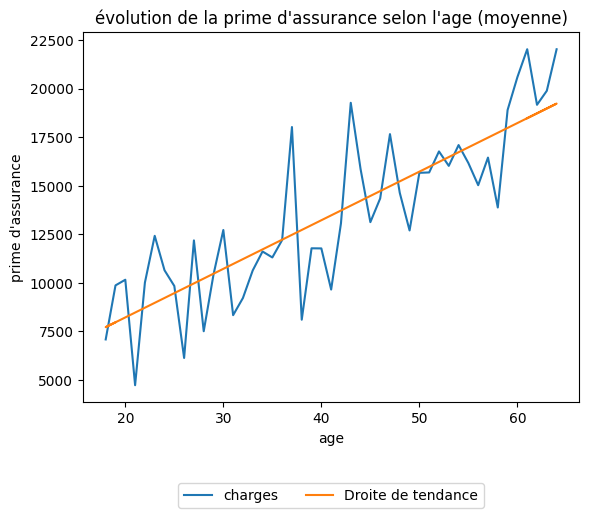

In [11]:
df_graph = pd.DataFrame(df_age)

# Création d'un graphique de lignes pour plusieurs séries de données
plt.figure(figsize=(8, 8))  # Définit la taille de la figure

df_graph.plot(x='age', y=['charges'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('age')
plt.ylabel("prime d'assurance")
plt.title("évolution de la prime d'assurance selon l'age (moyenne)")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['age'], df['charges'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['age'], tendance(df['age']), label='Droite de tendance')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

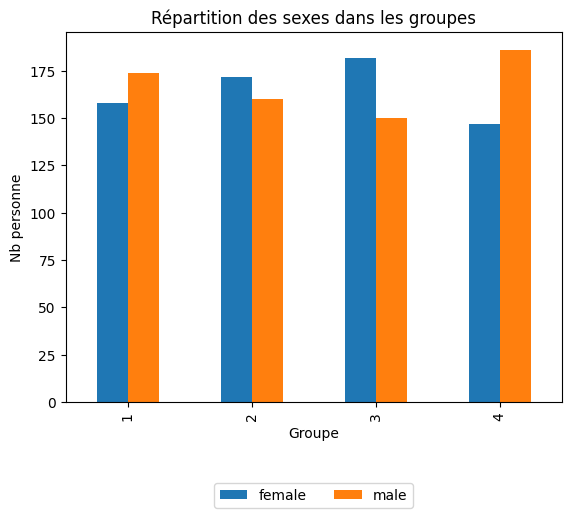

In [12]:
df_graph = pd.DataFrame(df_sex)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_graph.plot(x='group', y=['female', 'male'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des sexes dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

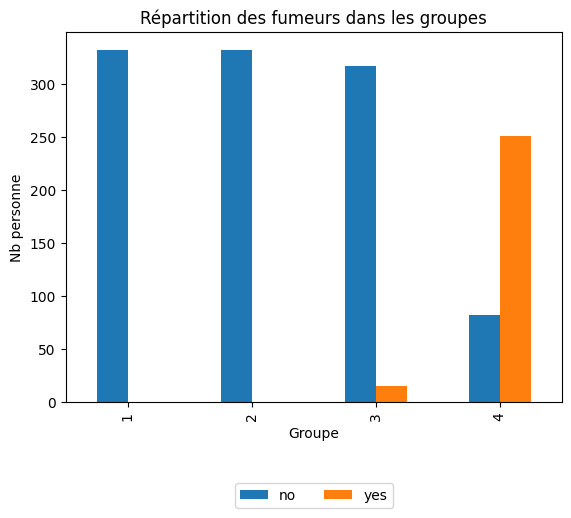

In [13]:
df_graph = pd.DataFrame(df_smoker)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_graph.plot(x='group', y=['no', 'yes'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des fumeurs dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

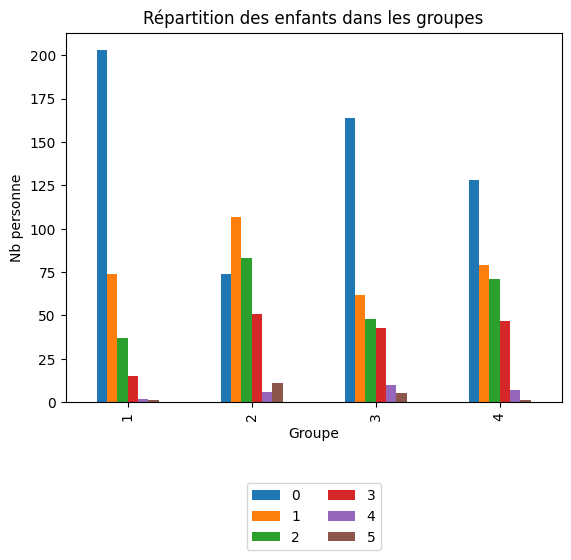

In [14]:
df_graph = pd.DataFrame(df_children)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_graph.plot(x='group', y=['0', '1', '2', '3', '4', '5'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des enfants dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

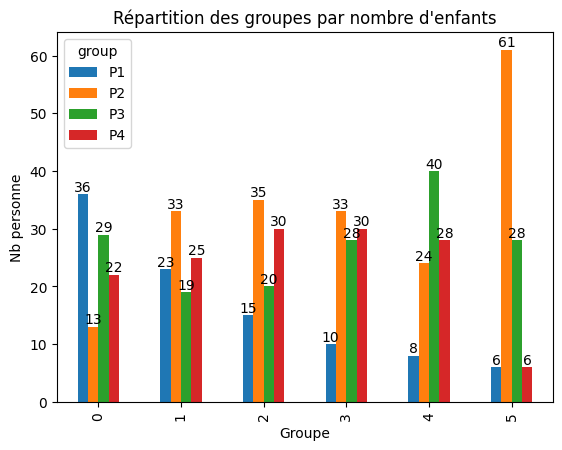

In [15]:
df_graph = pd.DataFrame(df_charges_by_children)

# Création d'un graphique à barres
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

# Tracer le graphique à barres
bars = df_graph.plot(x='children', y=['P1', 'P2', 'P3', 'P4'], kind='bar')

# Ajouter les labels et le titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title("Répartition des groupes par nombre d'enfants")

# Récupérer les hauteurs des barres pour placer les valeurs au-dessus
for container in bars.containers:
    plt.bar_label(container)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

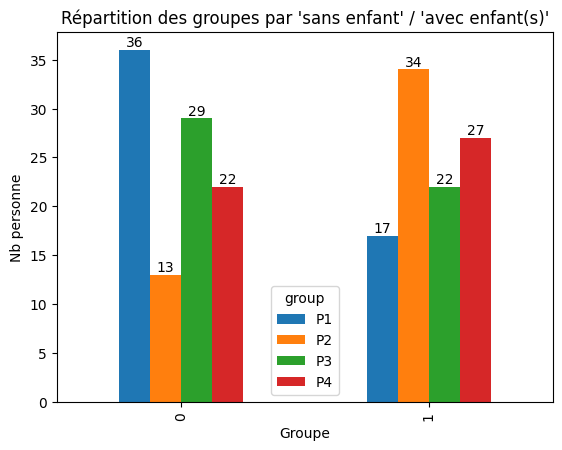

In [16]:
df_graph = pd.DataFrame(df_children_no_children)

# Création d'un graphique à barres
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

# Tracer le graphique à barres
bars = df_graph.plot(x='children', y=['P1', 'P2', 'P3', 'P4'], kind='bar')

# Ajouter les labels et le titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title("Répartition des groupes par 'sans enfant' / 'avec enfant(s)'")

# Récupérer les hauteurs des barres pour placer les valeurs au-dessus
for container in bars.containers:
    plt.bar_label(container)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

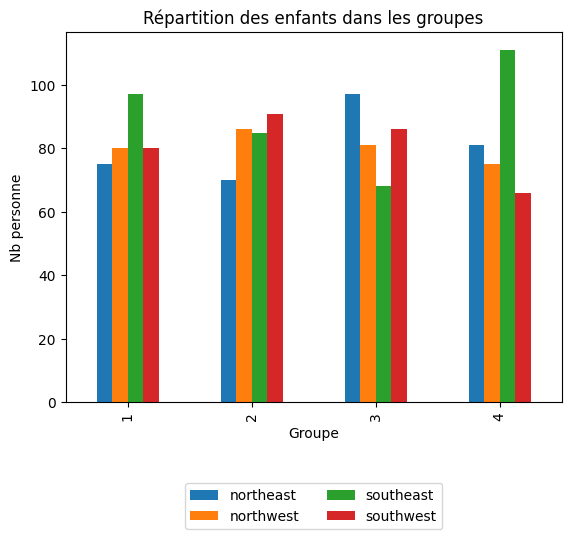

In [17]:
df_graph = pd.DataFrame(df_region)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_graph.plot(x='group', y=['northeast', 'northwest', 'southeast', 'southwest'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des enfants dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


In [18]:
df_region = df_group

display(df_region)

,age,sex,bmi,children,smoker,region,charges,group
0,19,female,27.900,0,yes,southwest,16884.92400,4
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,4
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,3
1333,18,female,31.920,0,no,northeast,2205.98080,1
1334,18,female,36.850,0,no,southeast,1629.83350,1
1335,21,female,25.800,0,no,southwest,2007.94500,1


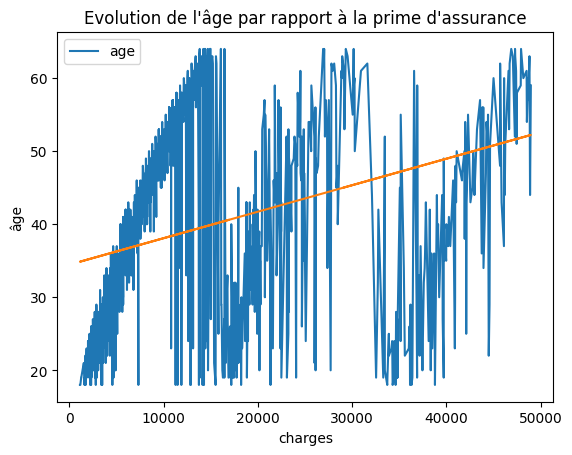

In [19]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['age'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel('âge')
plt.title("Evolution de l'âge par rapport à la prime d'assurance")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['charges'], df['age'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['charges'], tendance(df['charges']), label='Droite de tendance')

# Afficher le graphique
plt.show()


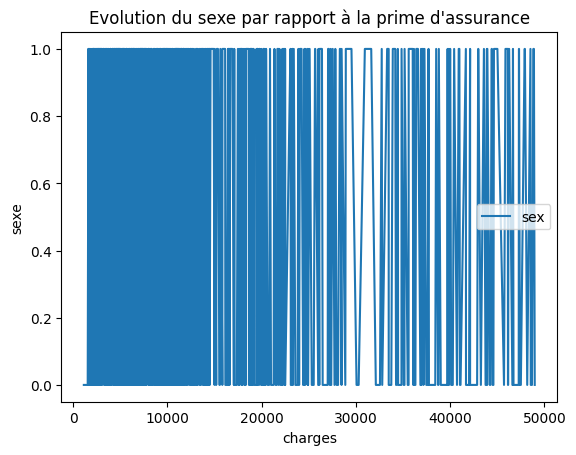

In [20]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['sex'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel('sexe')
plt.title("Evolution du sexe par rapport à la prime d'assurance")

# Afficher le graphique
plt.show()


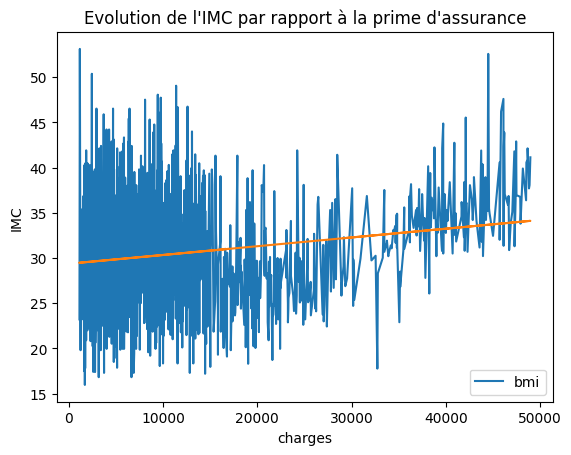

In [21]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['bmi'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel('IMC')
plt.title("Evolution de l'IMC par rapport à la prime d'assurance")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['charges'], df['bmi'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['charges'], tendance(df['charges']), label='Droite de tendance')

# Afficher le graphique
plt.show()


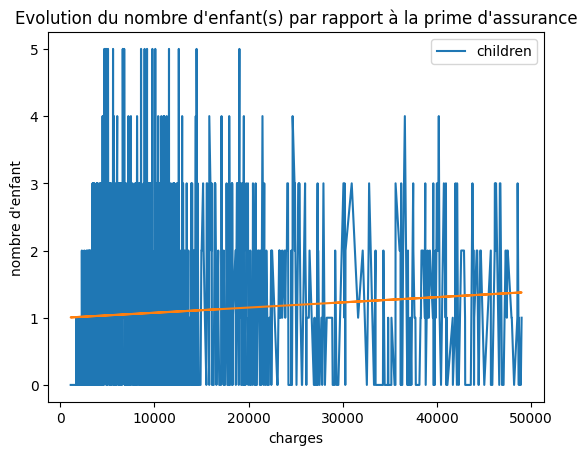

In [22]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['children'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel("nombre d'enfant")
plt.title("Evolution du nombre d'enfant(s) par rapport à la prime d'assurance")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['charges'], df['children'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['charges'], tendance(df['charges']), label='Droite de tendance')

# Afficher le graphique
plt.show()


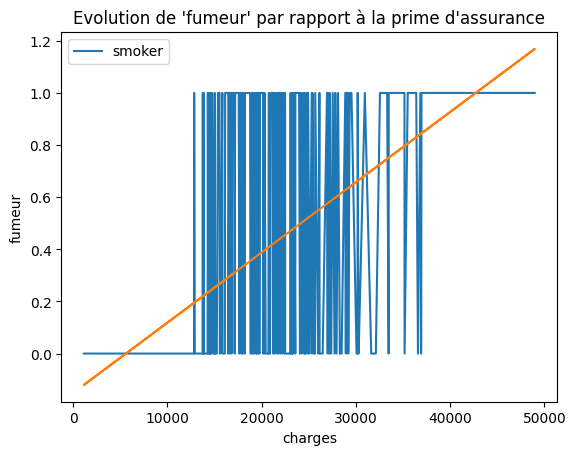

In [23]:
df_plot = df

df_plot = df_plot.sort_values(by='charges', ascending=True)

# Tracer les données de plusieurs colonnes sur un même graphique
df_plot.plot(x='charges', y=['smoker'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('charges')
plt.ylabel('fumeur')
plt.title("Evolution de 'fumeur' par rapport à la prime d'assurance")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['charges'], df['smoker'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['charges'], tendance(df['charges']), label='Droite de tendance')

# Afficher le graphique
plt.show()


In [24]:
display(df)

correlation = 0.5

df.fillna(0, inplace=True)

df_corr = df.corr(method='spearman')
df_corr = df_corr.abs()

# df_corr['age'] = np.where(df_corr['age'] > correlation, 'OK', '')
# df_corr['sex'] = np.where(df_corr['sex'] > correlation, 'OK', '')
# df_corr['bmi'] = np.where(df_corr['bmi'] > correlation, 'OK', '')
# df_corr['children'] = np.where(df_corr['children'] > correlation, 'OK', '')
# df_corr['smoker'] = np.where(df_corr['smoker'] > correlation, 'OK', '')
# df_corr['northeast'] = np.where(df_corr['northeast'] > correlation, 'OK', '')
# df_corr['southeast'] = np.where(df_corr['southeast'] > correlation, 'OK', '')
# df_corr['northwest'] = np.where(df_corr['northwest'] > correlation, 'OK', '')
# df_corr['southwest'] = np.where(df_corr['southwest'] > correlation, 'OK', '')
# df_corr['charges'] = np.where(df_corr['charges'] > correlation, 'OK', '')

df_corr['correlation'] = np.where(df_corr['charges'] > correlation, 'OK', '')
df_corr = df_corr[['charges', 'correlation']]

display(df_corr)

,age,sex,bmi,children,smoker,northeast,southeast,northwest,southwest,charges
0,19,1,27.900,0,1,NaN,NaN,NaN,1.0,16884.92400
1,18,0,33.770,1,0,NaN,1.0,NaN,NaN,1725.55230
2,28,0,33.000,3,0,NaN,1.0,NaN,NaN,4449.46200
3,33,0,22.705,0,0,NaN,NaN,1.0,NaN,21984.47061
4,32,0,28.880,0,0,NaN,NaN,1.0,NaN,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,NaN,NaN,1.0,NaN,10600.54830
1333,18,1,31.920,0,0,1.0,NaN,NaN,NaN,2205.98080
1334,18,1,36.850,0,0,NaN,1.0,NaN,NaN,1629.83350
1335,21,1,25.800,0,0,NaN,NaN,NaN,1.0,2007.94500


,charges,correlation
age,0.534981,OK
sex,0.008371,
bmi,0.111010,
children,0.135585,
smoker,0.656728,OK
northeast,0.048804,
southeast,0.014388,
northwest,0.019976,
southwest,0.043769,
charges,1.000000,OK


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

titanic = pd.read_csv('titanic-train.csv')
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]
titanic.dropna(axis=0, inplace=True)
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

y = titanic[['Survived']]
X = titanic[['Pclass', 'Sex', 'Age']]

model = KNeighborsClassifier(n_neighbors=4)
model.fit(X, y)
model.score(X, y)
model.predict(X)

def survie(model, pclass=3, sex=0, age=42):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

survie(model)

[0]
[[1. 0.]]


/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import scipy.stats

titanic = pd.read_csv('titanic-train.csv')
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]
titanic.dropna(axis=0, inplace=True)
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

y = titanic[['Survived']]
X = titanic[['Pclass', 'Sex', 'Age']]
display(y, X)

def performance(i, X, y) -> int:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X, y)
    return round(model.score(X, y),4)

best = 0
for i in range (1, 11):
    new = performance(i, X, y)
    if new > best:
        best = new
        best_text = f"BEST : n_neighbors={i} => {new}"
    print("n_neighbors :", i, "=>", new)
print(best_text)


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors : 1 => 0.8235
n_neighbors : 2 => 0.8221


/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors : 3 => 0.8291
n_neighbors : 4 => 0.8347


/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors : 5 => 0.8305
n_neighbors : 6 => 0.8165
n_neighbors : 7 => 0.8165


/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors : 8 => 0.8081
n_neighbors : 9 => 0.8179
n_neighbors : 10 => 0.8081
BEST : n_neighbors=4 => 0.8347


/home/utilisateur/Documents/projects/DEV_IA/insurance_premium_SC/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [53]:
# Exemple de DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Concaténation le long des colonnes (axis=1)
result = pd.concat([df1, df2], axis=0)

print(result)

   A  B
0  1  3
1  2  4
0  5  7
1  6  8
